# Análise Exploratória de Dados
Desafio de Dados: Ciência de Dados em RH | Turnover

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd              # Manipulação e análise de dados
import numpy as np               # Operações com arrays e matrizes
import matplotlib.pyplot as plt  # Visualização de gráficos
import plotly.express as px      # Criação de gráficos interativos
import seaborn as sns

# Leitura do dataset
dados = r'C:\Users\manunes\personal-projects\analise-rh\dataset\Base_dados - Rotatividade RH.xlsx'
df = pd.read_excel(dados, engine='openpyxl')

## Visão geral e estrutura do dataset

In [2]:
print('Tamanho do dataset:',df.shape[0], 'Linhas e', df.shape[1], 'Colunas')

Tamanho do dataset: 650 Linhas e 10 Colunas


In [3]:
print('Tipos de dados das variáveis:')
df.dtypes

Tipos de dados das variáveis:


Data_Contratacao        datetime64[ns]
Data_Desligamento       datetime64[ns]
Meses_de_Servico                 int64
Idade                            int64
Pontuacao_Desempenho           float64
Satisfacao_Trabalho            float64
Nivel_Cargo                     object
Salario                        float64
Horas_Extras                   float64
Desligamento                     int64
dtype: object

In [4]:
# Por praticidade, os nomes das variáveis serão convertidos em minúsculas
df.columns = df.columns.str.lower()

In [5]:
# Identificando a presença de dados ausentes nas variáveis
nulos = df.isnull().sum()
nulos

data_contratacao          0
data_desligamento       506
meses_de_servico          0
idade                     0
pontuacao_desempenho      0
satisfacao_trabalho       0
nivel_cargo               0
salario                   0
horas_extras              0
desligamento              0
dtype: int64

In [6]:
print(f'Temos {nulos.sum()} valores ausentes no conjunto de dados.')

Temos 506 valores ausentes no conjunto de dados.


In [7]:
porcentagem_nulos = (nulos / len(df) * 100).round(2).sort_values(ascending=False)
print('Variável              | nulos (%)')
porcentagem_nulos

Variável              | nulos (%)


data_desligamento       77.85
data_contratacao         0.00
meses_de_servico         0.00
idade                    0.00
pontuacao_desempenho     0.00
satisfacao_trabalho      0.00
nivel_cargo              0.00
salario                  0.00
horas_extras             0.00
desligamento             0.00
dtype: float64

In [8]:
# cabeçalho e rodapé do dataset
df

,data_contratacao,data_desligamento,meses_de_servico,idade,pontuacao_desempenho,satisfacao_trabalho,nivel_cargo,salario,horas_extras,desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0
...,...,...,...,...,...,...,...,...,...,...
645,2021-08-28,NaT,33,31,2.260088,1.539328,Pleno,7940.88,6.847854,0
646,2022-02-24,NaT,27,23,4.611915,2.521799,Junior,4893.95,4.583937,0
647,2022-10-22,NaT,19,21,4.688376,4.641638,Junior,3838.70,11.306088,0
648,2021-09-27,NaT,32,32,3.551361,3.998147,Pleno,4739.81,4.343341,0


<h3 style="color: orange;">Categorizando os Tipos de Variáveis e de Dados</h3> 

***
#### **Variáveis Numéricas**
<span style="color: gray;">**Dados Quantitativos:**</span>
- **meses_de_servico** - Discretos
- **idade** - Discretos
- **pontuacao_desempenho** - Contínuos
- **satisfacao_trabalho** - Contínuos
- **salario** - Contínuos
- **horas_extras** - Contínuos

<span style="color: gray;">**Dados Temporais:**</span>
- **data_contratacao** - Discretos
- **data_desligamento** - Discretos

<br> 

***

#### **Variáveis Categóricas**
<span style="color: gray;">**Dados Qualitativos:**</span>
- **nivel_cargo** - Ordinais
- **desligamento (status de desligamento)** - Nominal


In [9]:
# Variáveis Qualitativas
qualitativas = df[['nivel_cargo', 'desligamento']]
qualitativas.head(3)

,nivel_cargo,desligamento
0,Pleno,0
1,Sênior,1
2,Sênior,0


In [10]:
# Variáveis Quantitativas Temporais
temporais = df[['data_contratacao', 'data_desligamento']]
temporais.head(3)

,data_contratacao,data_desligamento
0,2024-02-14,NaT
1,2023-11-16,2024-05-14
2,2023-11-16,NaT


In [11]:
# Variáveis Quantitativas
variaveis_a_desconsiderar = pd.concat([qualitativas, temporais])
quantitativas = df.loc[:, ~df.columns.isin(variaveis_a_desconsiderar)]

quantitativas.head(3)

,meses_de_servico,idade,pontuacao_desempenho,satisfacao_trabalho,salario,horas_extras
0,3,24,2.066788,2.043644,4994.41,15.465241
1,6,43,3.256257,1.711719,8798.34,19.036627
2,6,45,4.827732,3.480214,8891.02,13.326408


***

### Primeiras observações:

Após entender melhor os tipos de variáveis e os dados que temos sobre a empresa, algumas perguntas podem guiar essa análise para descobertas relevantes:
1. Existe uma relação entre horas extras e satisfação no trabalho? (correlação entre a quantidade de horas extras e indicadores de desempenho)
2. Qual é a média de permanência dos funcionários na empresa antes de pedir demissão? 
3. Há uma correlação entre o tempo de serviço na empresa e a probabilidade de desligamento?
4. Quais são os principais fatores que explicam os salários mais altos? Tempo de empresa, desempenho, nível de cargo ou quantidade de horas extras?
5. Os funcionários com alto desempenho e salário baixo têm uma taxa de desligamento maior do que aqueles com o cenário oposto?
6. Existe uma correlação entre a satisfação no trabalho e o desempenho?
7. Qual é o tempo médio em que um funcionário júnior é desligado?
8. A idade do colaborador ou o tempo de serviço influenciam mais o desempenho? (Existe uma tendência de que os mais jovens passem menos tempo na empresa?)


======================================================================================================== <br>
<br>

**Dados Ausentes (Missing Values):**<br>

A coluna 'data_desligamento' apresenta dados nulos, o que conforme o dicionário dos dados, fazem sentido existir pois representam aqueles funcionários que ainda trabalham na empresa, e, portanto, não foram desligados. Será útil calcular quantos colaboradores ativos a empresa possui.

### [KPI's do RH](https://www.gupy.io/blog/turnover)(link de uma fonte confiável para embasar nosso estudo)

**Taxa de Desligamento(turnover):** 

**Taxa geral de retenção:** avalia quantos funcionários permanecem na empresa durante um intervalo de tempo

**Taxa geral de rotatividade:** oposto da taxa de retenção

**Índice de retençâo dos melhores talentos:** avalia os funcionários com alto desempenho

Todas possuem fórmulas para calcularmos as taxas e como já são métricas de RH, podemos nos basear nelas para obter resultados mais do cotidiano de people analytics e que vão ajudar a análise.

In [12]:
# Totais de contratados, desligados e ativos na empresa

total_contratados = df['data_contratacao'].count()
total_desligados = df['data_desligamento'].count()

total_ativos = total_contratados - total_desligados

print('Total de funcionários:',
      '\nContratados:', total_contratados,
      '\nDesligados:', total_desligados,
      '\nEm atividade:', total_ativos)

Total de funcionários: 
Contratados: 650 
Desligados: 144 
Em atividade: 506


Qual a taxa de desligamento dessa empresa?

In [13]:
turnover = (((total_contratados + total_desligados) / 2) / total_ativos).round(4) * 100

print(f'A taxa de desligamento da empresa é de {turnover}%')

A taxa de desligamento da empresa é de 78.46%


Qual o período que temos de contratação com os dados disponíveis?

In [14]:
data_inicial = temporais['data_contratacao'].min().strftime('%d-%m-%Y')
data_final = temporais['data_contratacao'].max().strftime('%d-%m-%Y')

print(f'Data inicial: {data_inicial}',
      f'\nData final: {data_final}')

Data inicial: 29-06-2021 
Data final: 14-02-2024


Os dados tem um histórico de contratações de 2 anos, 7 meses e 16 dias considerando o intervalo de datas.

Qual o período de desligamentos?

In [15]:
data_inicial_2 = temporais['data_desligamento'].min().strftime('%d-%m-%Y')
data_final_2 = temporais['data_desligamento'].max().strftime('%d-%m-%Y')

print(f'Data inicial: {data_inicial_2}',
      f'\nData final: {data_final_2}')

Data inicial: 14-05-2024 
Data final: 14-05-2024


Função para Análise de Frequência e Percentual | Variáveis Categóricas

In [16]:
def tabela_frequencia(df, variavel):
    """
    Calcula a frequência e a porcentagem de uma variável categórica em um DataFrame.

    Parâmetros:
    - df: DataFrame: DataFrame contendo os dados.
    - variavel: str: Nome da variável categórica a ser analisada.

    Retorna:
    - DataFrame: DataFrame com a frequência e porcentagem da variável categórica.
    """
    # Calcular a frequência
    frequencia = df[variavel].value_counts()

    # Calcular a porcentagem
    porcentagem = (frequencia / len(df) * 100).round(2)

    # Criar o DataFrame com a frequência e porcentagem
    tabela = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': porcentagem})

    # Renomear o índice da coluna
    tabela.index.name = 'Categorias' 
    tabela = tabela.reset_index()

    return tabela

In [17]:
# Passando a variável 'nivel_cargo' como parâmetro da função

nivel_profissional = tabela_frequencia(qualitativas, 'nivel_cargo')
nivel_profissional

,Categorias,Frequência,Porcentagem (%)
0,Junior,233,35.85
1,Pleno,225,34.62
2,Sênior,192,29.54


In [18]:
# Passando a variável 'desligamento' como parâmetro

status_colaborador = tabela_frequencia(qualitativas, 'desligamento')
status_colaborador

,Categorias,Frequência,Porcentagem (%)
0,0,506,77.85
1,1,144,22.15


Estatística Descritiva e Tabelas de Frequência | Variáveis Numéricas

data profile

In [19]:
# necessário instalar o 'pyspark' e o 'ydata-profiling' = pip install pyspark ydata-profiling 
from pyspark.sql import SparkSession
from ydata_profiling import ProfileReport

In [20]:
quantitativas.describe().round(2)

,meses_de_servico,idade,pontuacao_desempenho,satisfacao_trabalho,salario,horas_extras
count,650.00,650.00,650.00,650.00,650.00,650.00
mean,18.69,28.35,3.03,2.94,6131.59,10.10
std,9.65,8.01,1.17,1.15,2689.08,6.24
min,3.00,18.00,1.00,1.00,2004.50,0.00
25%,10.00,22.00,1.99,1.97,4023.75,4.98
50%,19.00,27.00,3.06,2.92,5562.95,9.41
75%,27.00,33.00,4.02,3.96,7814.48,14.75
max,35.00,49.00,4.99,5.00,11957.29,41.64


Séries Temporais | Variáveis Temporais

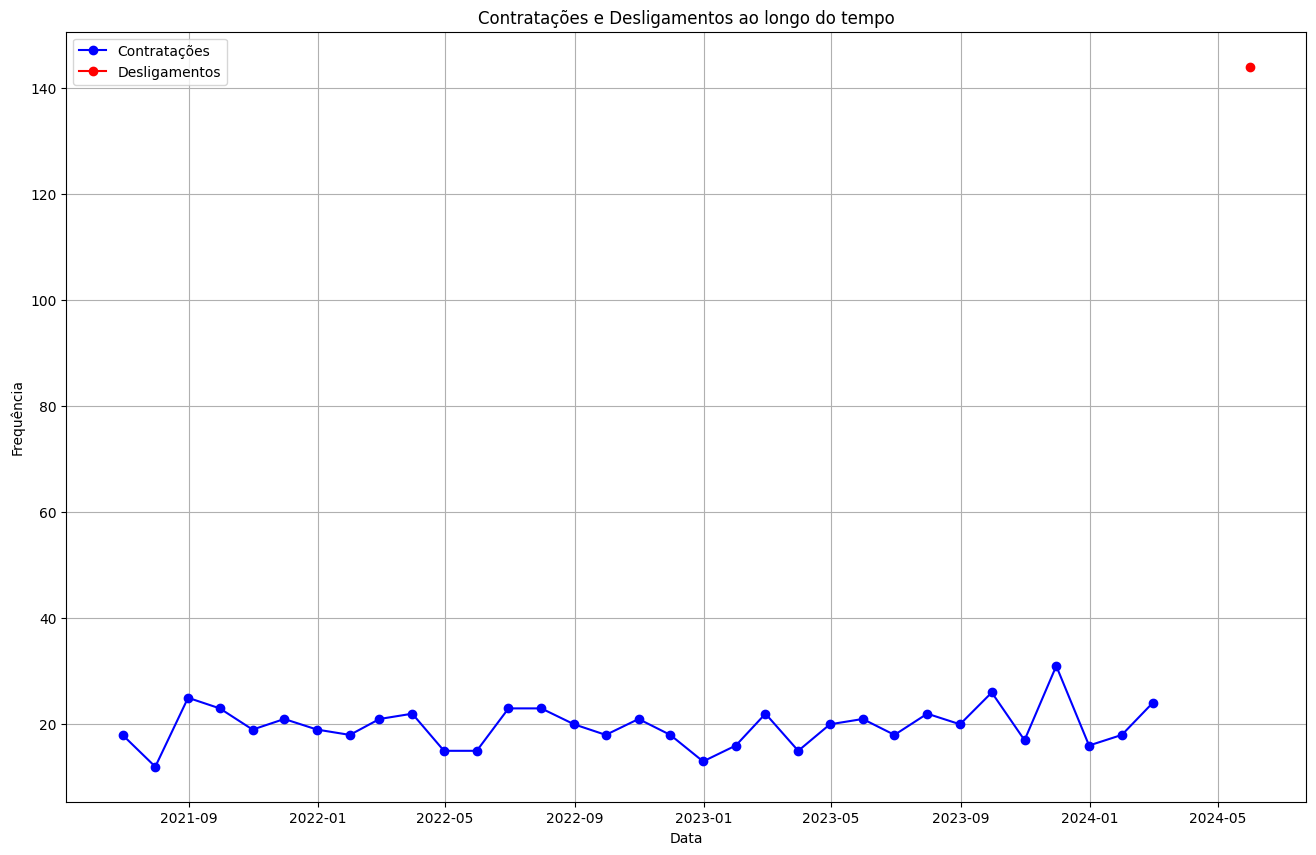

In [21]:
# Criação de uma série tempora para contratações e desligamentos

contratacoes = temporais['data_contratacao'].value_counts().resample('ME').sum()
desligamentos = temporais['data_desligamento'].value_counts().resample('ME').sum()

# Plotando o gráfico
plt.figure(figsize=(16,10))

# Plotar contratações
plt.plot(contratacoes.index, contratacoes.values, label='Contratações', color='blue', marker='o')

# Plotar desligamentos
plt.plot(desligamentos.index, desligamentos.values, label='Desligamentos', color='red', marker='o')

plt.title('Contratações e Desligamentos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)

plt.show()

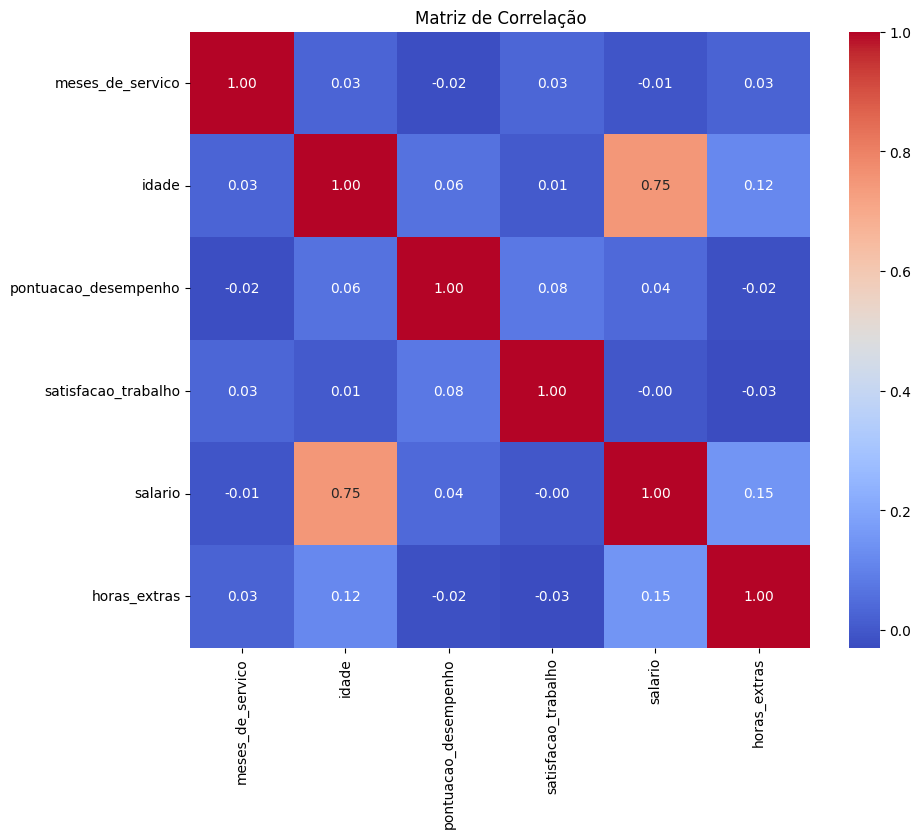

In [22]:
correlacao = quantitativas.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')  
plt.show()

In [23]:
quantitativas.columns

Index(['meses_de_servico', 'idade', 'pontuacao_desempenho',
       'satisfacao_trabalho', 'salario', 'horas_extras'],
      dtype='object')

In [24]:
# Plotar o boxplot com Plotly
fig = px.box(df, y=['meses_de_servico', 
                    'idade', 
                    'pontuacao_desempenho',
                    'satisfacao_trabalho', 
                    'salario', 
                    'horas_extras'], 
                    title='Boxplot das Variáveis')

fig.show()